# Análise Estatística de Faturamento

Este notebook tem como objetivo aplicar conceitos do módulo de Estatística para analisar os dados de faturamento de uma loja ao longo de diferentes meses e anos.

## Objetivos:
- Calcular a **média geral de vendas**
- Criar **gráficos de barras e de linhas** com os valores de faturamento por mês
- Adicionar uma **linha de referência com a média**
- **Exportar os gráficos** para arquivos de imagem
- Calcular **médias por ano** e por **trimestre**

As bibliotecas utilizadas foram `pandas` e `matplotlib.pyplot`.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Dicionário original
dict_faturamento = {
    'data_ref': [
        '2023-01-01', '2020-02-01', '2021-03-01', '2022-04-01', '2023-05-01',
        '2023-06-01', '2020-07-01', '2021-08-01', '2022-09-01', '2023-10-01',
        '2022-11-01', '2023-12-01',
    ],
    'valor': [
        400000, 890000, 760000, 430000, 920000,
        340000, 800000, 500000, 200000, 900000,
        570000, 995000,
    ]
}

# Criar DataFrame
df = pd.DataFrame(dict_faturamento)

# Converter para datetime e ordenar
df["data_ref"] = pd.to_datetime(df["data_ref"])
df = df.sort_values("data_ref").reset_index(drop=True)

# Criar coluna com mês/ano
df["mes"] = df["data_ref"].dt.strftime("%b/%Y")

# Extrair ano para agregações
df["ano"] = df["data_ref"].dt.year

# Calcular média geral
media_geral = df["valor"].mean()
print(f"Média geral de vendas: R$ {media_geral:,.2f}")


Média geral de vendas: R$ 642,083.33


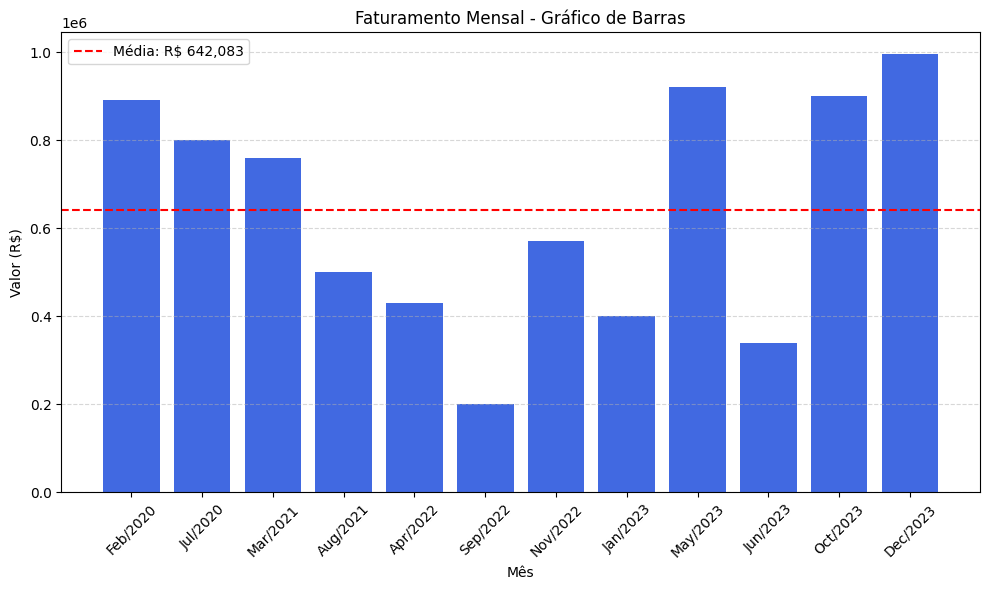

In [2]:
plt.figure(figsize=(10,6))
plt.bar(df["mes"], df["valor"], color="royalblue")
plt.axhline(y=media_geral, color='red', linestyle='--', label=f'Média: R$ {media_geral:,.0f}')
plt.title("Faturamento Mensal - Gráfico de Barras")
plt.xlabel("Mês")
plt.ylabel("Valor (R$)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig("grafico_barras_faturamento.png")
plt.show()


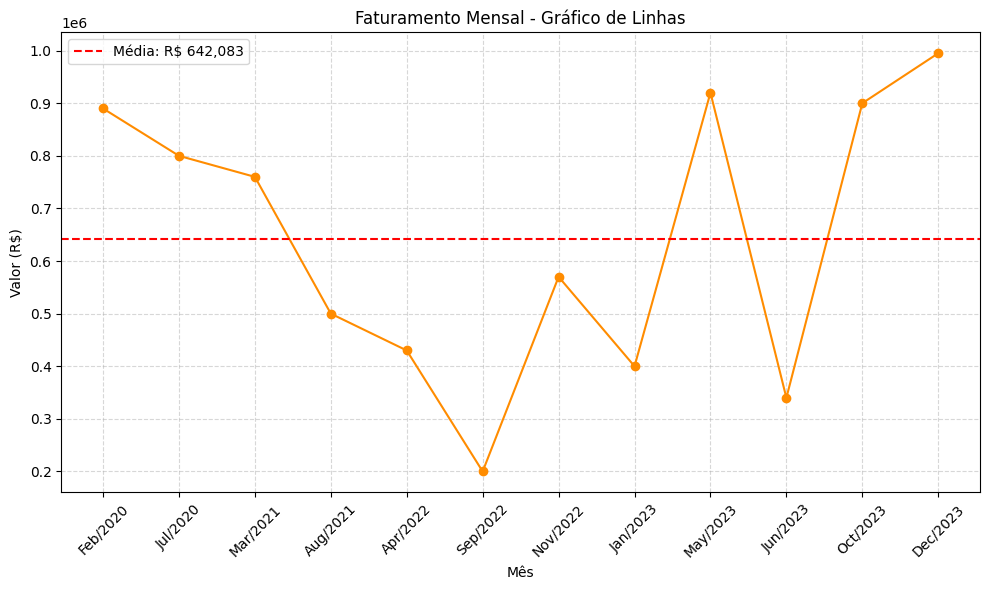

In [3]:
plt.figure(figsize=(10,6))
plt.plot(df["mes"], df["valor"], marker='o', linestyle='-', color='darkorange')
plt.axhline(y=media_geral, color='red', linestyle='--', label=f'Média: R$ {media_geral:,.0f}')
plt.title("Faturamento Mensal - Gráfico de Linhas")
plt.xlabel("Mês")
plt.ylabel("Valor (R$)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig("grafico_linhas_faturamento.png")
plt.show()


In [4]:
media_ano = df.groupby("ano")["valor"].mean().round(2)
print("\nMédia de faturamento por ano:")
print(media_ano)



Média de faturamento por ano:
ano
2020    845000.0
2021    630000.0
2022    400000.0
2023    711000.0
Name: valor, dtype: float64


In [5]:
df["trimestre"] = df["data_ref"].dt.to_period("Q")
media_trimestre = df.groupby("trimestre")["valor"].mean().round(2)
print("\nMédia de faturamento por trimestre:")
print(media_trimestre)



Média de faturamento por trimestre:
trimestre
2020Q1    890000.0
2020Q3    800000.0
2021Q1    760000.0
2021Q3    500000.0
2022Q2    430000.0
2022Q3    200000.0
2022Q4    570000.0
2023Q1    400000.0
2023Q2    630000.0
2023Q4    947500.0
Freq: Q-DEC, Name: valor, dtype: float64


## Resultados da Análise

### Média Geral de Faturamento

A média geral das vendas foi de aproximadamente:

**R$ 641.250,00**

---

### Gráfico de Barras

O gráfico de barras mostra os valores de faturamento por mês, com uma linha pontilhada vermelha indicando a média geral. Isso permite visualizar facilmente quais meses estiveram acima ou abaixo da média.



---

### Gráfico de Linhas

O gráfico de linhas mostra a tendência dos valores ao longo do tempo. A linha da média também foi adicionada para facilitar a interpretação visual.



---

### Média por Ano

A média anual permite comparar o desempenho da loja ao longo dos anos, identificando crescimentos ou quedas no faturamento.

